In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'2.2.2'

# Intro

Pandas' groupby is undoubtly one of the most powerful functionalities that Pandas brings to the table. However, most users only utilize a fraction of the capabilities of `groupby`.

`Groupby` allows to adopt a split-apply-combine approach to your data set. This is comparable to slicing and dicing your data such that it serves your specific need.

On a high level this means:
1. split the data based on column(s)/condition(s) into groups
2. apply a function/transformation to all the groups and combine the results into an output

# 0. Load the data

We are going to use data from a hypothetical sales division where we have, among other columns ficticious sales reps, order leads, order values, the company the deal might happen with and the date of the order lead.

In [4]:
order_leads = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/order_leads.csv',
    parse_dates = [3]
)
sales_team = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/sales_team.csv',

)


In [12]:
order_leads.sample(5)

,Order Id,Company Id,Company Name,Date,Order Value,Converted
69803,YE60W5TMOSGWKE4D,QUQFAVYEFJK5H0JU,Pre-War Victor-Butler,2015-03-08,8761,1
84186,5BWNPUUJDWBL6ZZ0,LYCGYCLWLW54BCDY,29Th Feature,2016-12-03,3027,1
39143,QESDPJZFHV7EUBY1,CTOLC5XGN2FSDCEW,Center Observances,2016-08-10,1718,0
37116,0CV0HIOFGA75IROQ,HRLSDMVI5YN6BZIA,International Tikopia,2015-03-04,6200,1
68133,9C1C2NYQROCH46BG,FP7UY8FYYIPQJ9B5,Dam Maxim,2017-02-11,604,0


In [13]:
sales_team.sample(5)

,Sales Rep,Sales Rep Id,Company Name,Company Id
1068,Evelyn Martin,AX1MOR9E36M1Y5FD,Hapless Manufacture,PU60Y56YB6ELF4FJ
2935,Janet Robinson,9MURT7FM732H8GMW,Drowsy Medium'S,K2W78CELAWK9IWSD
306,Julio Woodard,Z5LDV3JJJN5YH6JX,Skeletal Offutt,KCIGKII3QC6RPLIP
1212,Nedra Easley,WWWYMPA7DT9AB3S6,Theological Ignition,36HLQRYTDWC1UH91
94,Arlene Collier,V5PQK16I7B9J8U3A,Jurisdictional Amaral,IAFV0T6H12JEOXOG


In [6]:
sales_team.columns

Index(['Sales Rep', 'Sales Rep Id', 'Company Name', 'Company Id'], dtype='object')

In [8]:
order_leads.shape

(100000, 6)

In [9]:
order_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order Id      100000 non-null  object        
 1   Company Id    100000 non-null  object        
 2   Company Name  100000 non-null  object        
 3   Date          100000 non-null  datetime64[ns]
 4   Order Value   100000 non-null  int64         
 5   Converted     100000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
sales_team.sample(5)

In [10]:
sales_team.shape

(4619, 4)

In [ ]:
sales_team.columns

In [ ]:
sales_team[sales_team['Sales Rep'] == 'Christina Clark']

In [ ]:
order_leads.columns

In [ ]:
sales_team.columns

In [11]:
print(sales_team.shape)
print(order_leads.shape)

(4619, 4)
(100000, 6)


In [17]:
df = pd.merge(order_leads,sales_team,on=['Company Id','Company Name'])
df.head()
# df.shape

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [21]:
df.Converted.value_counts().values


array([83092, 16908])

In [ ]:
# plot the bar chart of the number of pitches successful and unsucessful.
plt.bar(x=['Unsucessful(0)','Sucessful(1)'],height=df.Converted.value_counts().values)
plt.title("Sales Pitch Succesful and Unsuccesful")
plt.xlabel("Sales Status")
plt.ylabel("Count of Sales Status")
plt.show()

In [ ]:
# plot the bar char of total order value of succ and unsucc pitch
total_order_value_1 = df[df.Converted==1]['Order Value'].sum()
total_order_value_0 = df[df.Converted==0]['Order Value'].sum()
plt.figure(figsize=(10,4))
plt.bar(x=['Total Order Value of Unsucessful Pitches','Total Order Value of Sucessful Pitches'], height=[total_order_value_0,total_order_value_1])
plt.show()

In [24]:
df.Converted.value_counts()

,count
Converted,
0,83092
1,16908


In [ ]:
df.head(3)

In [ ]:
df.head(4)

In [48]:
a = df.groupby('Converted')['Order Value'].sum()
a

,Order Value
Converted,
0,420582009
1,85712421


In [49]:
b = df.groupby('Converted')[['Order Value']].sum()
b

,Order Value
Converted,
0,420582009
1,85712421


In [51]:
print(a.values)
print(b.values)

[420582009  85712421]
[[420582009]
 [ 85712421]]


In [39]:
a=df.groupby("Converted")['Order Value'].agg(sum)
a


/tmp/ipython-input-4105842917.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  a=df.groupby("Converted")['Order Value'].agg(sum)


,Order Value
Converted,
0,420582009
1,85712421


Text(0.5, 0, 'Graph')

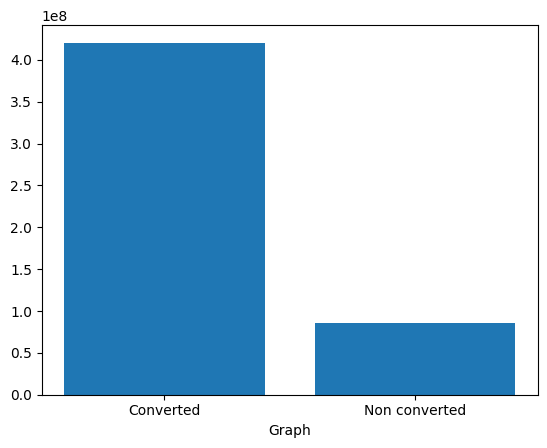

In [53]:
plt.bar(x=['Converted', 'Non converted'],height=a.values)
plt.xlabel('Graph')

# 1. Groupby: Split the data based on condition/column into groups

The default approach of calling groupby, is by explicitly providing a column name to split the dataset by. However, and this is less known, you can also pass a Series (has to have the same length as the dataframe) to groupby.
This means that you can group by a processed version of a column, without having to create a new helper column for that.

### groupby sales rep
First let's create a grouped DataFrame, i.e. split the dataset up.

In [ ]:
df.head(2)

In [57]:
df.groupby(['Sales Rep', 'Company Name', 'Converted']).first()

Order Id  \
Sales Rep         Company Name             Converted                     
Aaron Hendrickson 6-Foot Homosexuals       0          LUGEHPZ2HFKLEF1L   
                                           1          WBEX2JZXED721OXI   
                  63D House'S              0          0J72LZBMQJRVSEUZ   
                                           1          C9EDJV3D7FVZW31N   
                  Angular Liberalism       0          3YJD8CFEW9LRGJ2K   
...                                                                ...   
Yvonne Jones      Smarter Java             1          CW3R5CXK4DCF4G92   
Yvonne Lindsey    Meretricious Fabrication 0          93DAW0S29KO0NH0G   
                                           1          7C2OO5J3YO3D99JG   
                  Shrill Co-Op             0          EZXZBVQPW5PWDW40   
                                           1          RDCQ0VCJEF6STBIS   

                                                            Company Id  \
Sales Rep         Company Name             Converted                     
Aaron Hendrickson 6-Foot Homosexuals       0          OBO1IDFAZIVFRG9A   
                                           1          OBO1IDFAZIVFRG9A   
                  63D House'S              0          SPKG45IHYO76EWEA   
                                           1          SPKG45IHYO76EWEA   
                  Angular Liberalism       0          AGFI002RNQTP41KM   
...                                                                ...   
Yvonne Jones      Smarter Java             1          I7K8YY52IKCZ3SXR   
Yvonne Lindsey    Meretricious Fabrication 0          57G8KMLJ4TP42A5V   
                                           1          57G8KMLJ4TP42A5V   
                  Shrill Co-Op             0          IGOZET5TU8NF7FX0   
                                           1          IGOZET5TU8NF7FX0   

                                                           Date  Order Value  \
Sales Rep         Company Name             Converted                           
Aaron Hendrickson 6-Foot Homosexuals       0         2014-04-13         9399   
                                           1         2015-04-08         6005   
                  63D House'S              0         2017-02-13         9932   
                                           1         2018-04-04         3717   
                  Angular Liberalism       0         2016-01-18         1701   
...                                                         ...          ...   
Yvonne Jones      Smarter Java             1         2015-09-29         3290   
Yvonne Lindsey    Meretricious Fabrication 0         2015-08-23         3872   
                                           1         2018-10-27         6735   
                  Shrill Co-Op             0         2018-06-07         1233   
                                           1         2017-08-15         9462   

                                                          Sales Rep Id  
Sales Rep         Company Name             Converted                    
Aaron Hendrickson 6-Foot Homosexuals       0          AEMLQ09IYM72ACBL  
                                           1          AEMLQ09IYM72ACBL  
                  63D House'S              0          AEMLQ09IYM72ACBL  
                                           1          AEMLQ09IYM72ACBL  
                  Angular Liberalism       0          AEMLQ09IYM72ACBL  
...                                                                ...  
Yvonne Jones      Smarter Java             1          GNSJO948HA09N564  
Yvonne Lindsey    Meretricious Fabrication 0          LBSKFCGCB0IZTMWN  
                                           1          LBSKFCGCB0IZTMWN  
                  Shrill Co-Op             0          LBSKFCGCB0IZTMWN  
                                           1          LBSKFCGCB0IZTMWN  

[9105 rows x 5 columns]

In [55]:
df.groupby(['Sales Rep', 'Company Name', 'Converted']).first()

In [ ]:
# ended here

In [ ]:
df.head(3)

In [69]:
df.groupby(['Sales Rep', 'Converted'])[['Order Value']].agg(['sum','count'])

Order Value      
                                    sum count
Sales Rep         Converted                  
Aaron Hendrickson 0             1332129   246
                  1              218479    46
Adam Sawyer       0             1342323   276
                  1              245505    48
Adele Kimmel      0              424275    95
...                                 ...   ...
Willie Sanchez    1              269773    52
Yvonne Jones      0              332515    62
                  1               83873    12
Yvonne Lindsey    0              239328    49
                  1               85006    18

[998 rows x 2 columns]

In [70]:
# ---ended here---

In [ ]:
grouped_by_sales_rep = df.groupby(['Sales Rep','Converted'])[['Order Value']]
grouped_by_sales_rep

In [ ]:
# Sales rep having high sales
df.groupby('Sales Rep',)['Order Value'].sum().sort_values(ascending=False)

In [ ]:
df[df.Converted==1].groupby('Sales Rep')['Order Value'].sum().sort_values(ascending=False)

In [ ]:
df[df.Converted==1].groupby('Sales Rep')['Order Value'].agg([min,max,sum]).sort_values(ascending=False,by='max')

In [ ]:
grouped_by_sales_rep

### show all groups
calling `groups` on the grouped object returns the list of indices for every group (as every row can be uniquely identified via it's index)

In [ ]:
grouped_by_sales_rep = df.groupby(['Sales Rep','Converted'])['Order Value']
grouped_by_sales_rep

In [ ]:
grouped_by_sales_rep.groups

In [ ]:
len(grouped_by_sales_rep.groups)

### select a specific group

In [ ]:
grouped_by_sales_rep.get_group(('Aaron Hendrickson', 0))

For the following examples we will use the simplest version of the apply step (and just count the rows in each group) via the `size` method. We do this, so that we can focus on the groupby operations.

We will go into much more detail regarding the apply methods in section 2 of the article.

### Basic Example: Count rows in each group

In [ ]:
grouped_by_sales_rep.size().sort_values(ascending=False)


In [ ]:
df['Sales Rep'].value_counts()

### Advanced Example: Group by first name of sales rep

In [ ]:
# Grouping by first name of our Sales Rep without creating a column
df.groupby(df['Sales Rep'].apply(lambda x: x.split(' ')[0])).size()

### Advanced Example:  Grouping by whether or not there is a "William" in the name of the rep

In [ ]:
df.groupby(df['Sales Rep'].apply(lambda x: 'William' in x)).size()

### Advanced Example: Group by random series (for illustrative purposes only)

In [ ]:
# Grouping random letters (obviously does not make sense)
df.groupby(
    pd.Series(np.random.choice(list('ABCDG'),len(df)))
).size()

### Advanced Example:  Grouping by 3 evenly cut "Order Value" buckets

In [ ]:
# qcut bins the passed Series into q evenly sized parts (and labels the bins)
df.groupby(
    pd.qcut(x=df['Val'],q=3,labels=['low','mid','high'])
).size()

### Advanced Example: Grouping by cutom "Order Value" buckets

In [ ]:
# cut bins the passed Series into defined bins
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).size()

## `pd.Grouper`
The biggest "gotcha" in that area for me was understanding pd.Grouper, which allows seamless aggregation on different date/time granularities.


### Advanced Example: Grouping by year

In [ ]:
df.sort_values(by='Date')

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
30043,ZKELVCXTAM6JP4QH,C7LWXDFJHU22LJ5X,Consonantal Greyhound,2014-01-01,1175,0,Joyce Mitchell,DPD59XRXB1EQETP6
70895,LMJU1YKWL7L0YNTS,6LK91GTMX7WE7WT9,Unrestricted Resolve,2014-01-01,9468,0,John Barger,ERU9FRGKUDXUVJC9
81937,K3SSVBA583Y06M7V,491QJU77ME9K26XN,Three-Man Parker,2014-01-01,550,0,Lauren Williams,SWTK8TI7H1N6R5TT
76826,ANCRFO037ZAK5SCC,R2B8SA2UAPE48A1P,Patristic Landmarks,2014-01-01,1029,1,Joshua Langston,JLFJTRVWBA2NY78N
71283,EE9731E90OA3KLD4,9WCS6SCG07DAZZXK,Inspiring Boastings,2014-01-01,4767,0,Jason Miller,7BN2XSEUSWLSMZSI
...,...,...,...,...,...,...,...,...
52851,LBBF05DNYD73W4N8,ES0RSAKBKNBAVAPX,Formidable Stratum,2018-12-31,1553,0,Ralph Jones,ACV8X6HRAICU5X9Y
9592,11EVU6PKO6U2528T,61SQIM6PNOYJ7VOQ,Poly-Unsaturated Closure,2018-12-31,1941,0,Michael Bishop,D413RSXQPBUN297Q
66837,LWWQXY0KP2J2JHYH,F98D5UFUAHIU2YWO,Channel-Type Flooring,2018-12-31,6343,0,John Hammock,BAR0BX3NLRDR7XIF
61890,FJ3LHNYA8N0OBE8R,WNIKGGYTDR0OFGVZ,Indecent Erlenmeyer,2018-12-31,8906,0,Myra Chronister,X9KZ0NO060W3AGG7


In [ ]:
df.groupby(pd.Grouper(key='Date',freq='Y')).agg('max')

,Order Id,Company Id,Company Name,Order Value,Converted,Sales Rep,Sales Rep Id
Date,,,,,,,
2014-12-31,ZZQU2PEEMTP2Q8TI,ZZJHXY1WGI1IXER2,Zodiacal Indigation,9999,1,Yvonne Lindsey,ZTZA0ZLYZR85PTUJ
2015-12-31,ZZY9LL1EADUJRP2P,ZZJHXY1WGI1IXER2,Zodiacal Indigation,9999,1,Yvonne Lindsey,ZTZA0ZLYZR85PTUJ
2016-12-31,ZZXKRBXVAU6EV73G,ZZJHXY1WGI1IXER2,Zodiacal Indigation,9999,1,Yvonne Lindsey,ZTZA0ZLYZR85PTUJ
2017-12-31,ZZQOEN3H1KT1C43U,ZZJHXY1WGI1IXER2,Zodiacal Indigation,9999,1,Yvonne Lindsey,ZTZA0ZLYZR85PTUJ
2018-12-31,ZZZLGTRNSTB4RI9O,ZZJHXY1WGI1IXER2,Zodiacal Indigation,9998,1,Yvonne Lindsey,ZTZA0ZLYZR85PTUJ


### Advanced Example: Grouping by quarter

In [ ]:
# grouping by year
df.groupby(pd.Grouper(key='Date',freq='SM')).size()

### Advanced Example: Grouping by multiple columns

In [ ]:
df.groupby(['Sales Rep','Company Name']).size()

# 2. Apply and Combine: Apply a function/transformation to all groups and combine the results into an output

In the previous section we discussed how to group the data based on various conditions. This section deals with available functions that we can apply to the groups before combining them to a final result.

The section is structured along how to use
1. apply,
2. agg(regate),
3. transform, and
4. filter,
on a grouped object.

If you are anything like me when I started using groupby, you are probably using a combination of 1. and 2. along the lines of:

`group = df.groupby('GROUP')` and then:
- `group.apply(mean)`
- `group.agg(mean)`
- `group['INTERSTING COLUMN'].apply(mean)`
- `group.agg({'INTERSTING COLUMN':mean})`
- `group.mean()`

Where `mean` could also be another function.

All of them work. And most of the time, the result is going to be roughly what you expected it to be. However, there are nuances to apply and agg that are worthwhile pointing out.

Additionally, but much more importantly there are two lesser-known extremly powerful functions that can be used on a grouped object, `filter` and `transform`.

### `Apply`: Let's get  `apply` out of the way
This is somewhat confusing, as we often talk about applying functions while there also is an apply function. But bear with me. The `apply` function applies a function along an axis of the DataFrame. This could be either column-wise or row-wise.
`apply` is not strictly speaking a function that can only be used in the context of groupby. It could also used on an entire dataframe, like in the following example.

In [ ]:
_ = pd.DataFrame(
    np.random.random((2,6)),
    columns=list('ABCDEF')
)
_

In [ ]:
_.apply(sum, axis=0) # axis=0 is default, so you can drop that

In [ ]:
_.apply(sum, axis=1)

But it can also be used in a groupby context. Which makes sense, considering the fact that each group is a smaller DataFrame on its own. Keep in mind that the function will be applied to the entire DataFrame. This means typically you want to select the columns you are `applying` a function to. We will leave it at these examples and instead focus on `agg(regation)` which is the "intended" way of aggregating groups.

In [ ]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Sale'].apply(sum)

In [ ]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum)

In [ ]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum).to_clipboard(sep=' ')

# `agg(regate)`

In [ ]:
Image(filename='groupby-agg.png')

In [ ]:
# agg(regation)
df.groupby('Sales Rep')\
\
.agg({
    'Order Id':'size',
    'Val':['sum','mean'],
    'Sale':['sum','mean']
})

In [ ]:
def cr(x):
    return round(np.mean(x),2)

aggregation = {
    'Potential Sales':('Val','size'),
    'Sales':('Sale','sum'),
    'Conversion Rate':('Sale',cr)
}

df.groupby('Sales Rep').agg(**aggregation)

In [ ]:
def cr(x):
    return round(np.mean(x),2)

_ = df.groupby('Sales Rep').agg({
    'Val':'size',
    'Sale':['sum',cr]
})

_.columns = ['Potential Sales','Sales','Conversion Rate']
_

## Transform

In [ ]:
Image(filename='groupby-transform.png')

In [ ]:
df.groupby('Sales Rep')['Val'].transform(lambda x: x/sum(x))

In [ ]:
df['%'] = df.groupby('Sales Rep')['Val'].transform(
  lambda x: x/sum(x)
)

In [ ]:
del df['%']

In [ ]:
# filter (at least 200k in sales)
df.groupby('Sales Rep').filter(lambda x: (x['Val'] * x['Sale']).sum() > 200000)

In [ ]:
# Let's add this for verification
df['cr'] = df.groupby('Sales Rep')['Sale'].transform('mean')

df.groupby('Sales Rep').filter(lambda x: x['Sale'].mean() > .3)

In [ ]:
del df['cr']

# Advanced Examples Agg

In [ ]:
# Grouping by 3 evenly cut "Order Value" buckets
df.groupby(
    pd.qcut(df['Val'],3,['low','mid','high'])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

In [ ]:
# Grouping by cutom "Order Value" buckets
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

In [ ]:
df.groupby(
    pd.cut(df['Val'],[0,5000,10000],labels=['low','high'])
).agg(
    **{'Conversion Rate':pd.NamedAgg(column='Sale',aggfunc=lambda x: sum(x)/len(x))}
)

In [ ]:
# grouping by year and a cut oder value column
df.groupby(
    [pd.Grouper(key='Date',freq='Y'),pd.qcut(df['Val'],3,['low','mid','high'])]
).agg(
    **{'Conversion Rate':pd.NamedAgg(column='Sale',aggfunc=lambda x: sum(x)/len(x))}
).unstack()